In [307]:
#import os.path
import numpy as np
import pandas as pd
import cPickle as pickle
from image_processing import get_domi_color_new_image
from scipy.spatial.distance import cosine, euclidean
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer

In [385]:
from sklearn.cluster import KMeans
import skimage
from pyimage.pipeline import ImagePipeline
from collections import Counter
import time
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

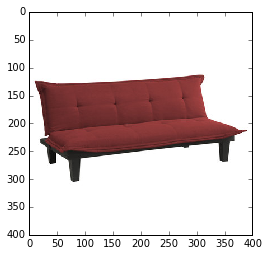

In [467]:
image = skimage.io.imread('wayfair/images/sofa_all/futon_DRL1299_12.jpg')
skimage.io.imshow(image)

In [451]:
domi_color = get_domi_color_new_image(image)
domi_color

array([ 0.44787078,  0.19762043,  0.19725439])

In [21]:
def show_domi_color(image, n_clusters=2):
    image = skimage.transform.resize(image, (300,300,3))
    nrow, ncol, depth = image.shape 
    lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_transform(lst_of_pixels)
    domi_colors = kmean.cluster_centers_ 
    domi_colors = domi_colors.reshape((1,n_clusters,3))
    skimage.io.imshow(domi_colors)
    return domi_colors

array([[[ 0.99857286,  0.99824809,  0.99818238],
        [ 0.4478624 ,  0.19760153,  0.19723607]]])

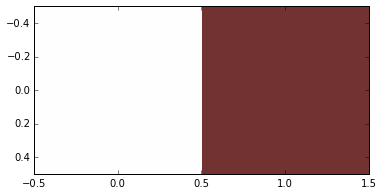

In [22]:
show_domi_color(image)

In [27]:
product_id = 'DRL1299'
sofa_all_df = pd.read_json('wayfair/sofa_all.json')
text = sofa_all_df[sofa_all_df['product_id']==product_id].description_all.values[0]

In [28]:
text

u'Style meets functionality in the DHP Lodge Futon Frame and Mattress. This modular futon and mattress can be converted from a sofa to a bed in less than a minute, thanks to the incorporated Click-Clack sofa technology. Featuring a wooden frame, this futon is strong and sturdy. The mattress section is upholstered in microfiber that makes the futon comfortable for sitting or sleeping for long hours. As this futon and mattress is available in black color, it mingles well with almost all color schemes. This Lodge Futon Frame and Mattress by DHP requires assembly upon arrival. It has a maximum weight carrying capacity of 600 lbs. \n\nFeatures\n\nIdeal for sitting, lounging and sleeping\nAdvanced click-clack mechanism\nMicrofiber upholstery for easy clean\nWeight limit: 600 lbs\nMattress is attached to the frame\nRecommended for spot cleaning only\nCompatible with Twin size sheets\n\n\n\nProduct Details\n\nStyle:  Contemporary\n\n\nFrame Material:  Wood\n\n\nToss Pillows Included:  No\n\nUp

# Now for the new image: I've got the image & text

## load models & stuff
    # domi_color_dict
    # km_color_domi
    # cluster_label_dict_domi
    
    # feature_dict_pca
    # pca_scaler
    # pca_model
    # km_feature_pca
    # cluster_label_dict_pca
    
    # tfidf
    # tfidf_matrix

In [92]:
with open('wayfair/pickle/sofa_domi_color_dict.pkl') as f:
    domi_color_dict = pickle.load(f)
with open('wayfair/pickle/sofa_km_color_domi.pkl') as f:
    km_color_domi = pickle.load(f)

with open('wayfair/pickle/sofa_feature_dict_pca.pkl') as f:
    feature_dict_pca = pickle.load(f)
with open('wayfair/pickle/sofa_pca_scaler.pkl') as f:
    pca_scaler = pickle.load(f)
with open('wayfair/pickle/sofa_pca_model.pkl') as f:
    pca_model = pickle.load(f)
with open('wayfair/pickle/sofa_km_feature_pca.pkl') as f:
    km_feature_pca = pickle.load(f)

In [34]:
with open('wayfair/pickle/sofa_cluster_label_dict_domi.pkl') as f:
    cluster_label_dict_domi = pickle.load(f)
with open('wayfair/pickle/sofa_cluster_label_dict_pca.pkl') as f:
    cluster_label_dict_pca = pickle.load(f)

In [113]:
with open('wayfair/pickle/sofa_tfidf.pkl') as f:
    tfidf = pickle.load(f)
with open('wayfair/pickle/sofa_tfidf_matrix.pkl') as f:
    tfidf_matrix = pickle.load(f)

## domi color:

In [37]:
domi_label = km_color_domi.predict(domi_color)[0]
domi_label

6

In [42]:
domi_same_label = []
for i in cluster_label_dict_domi:
    if cluster_label_dict_domi[i] == domi_label:
        domi_same_label.append(i)

In [192]:
domi_same_label[0].split('.')[0].split('_')[-2]

'MCRR1607'

In [193]:
similar_item_domi = []
for i in domi_same_label:
    similar_item_domi.append(i.split('.')[0].split('_')[-2])
similar_item_domi

['MCRR1607',
 'DRL1299',
 'KMDS1431',
 'EL2638',
 'FZU1801',
 'NEI1108',
 'XHX2148',
 'MCRR1869',
 'EL2641',
 'DQPG1046',
 'GQ3384',
 'DQH1414',
 'LAZA1090',
 'DQPG1040',
 'DQPG1036',
 'GNT5298',
 'OTL1508',
 'MCRR1869',
 'EL1035',
 'CSTM1113',
 'JMFU1287',
 'FOW2014',
 'FHDG1005',
 'CSTM1253',
 'ZIPC1493',
 'JAX1314',
 'EL2641',
 'MCRR1869',
 'MCRR1871',
 'DRL1086',
 'XHX1802',
 'ZIPC1492',
 'NEI1108',
 'ZIPC1493',
 'UFI2623',
 'CSTM1350',
 'FOW2257',
 'DQPG1046',
 'DQPG1059',
 'DQPG1039',
 'KLL1923',
 'CSTM1207',
 'XSQ1798',
 'CSTM1248',
 'BL5769',
 'BRH3744',
 'MCRR1646',
 'ENT1125',
 'EPCF1056',
 'OTL2005',
 'MCRR1871',
 'LAZA1092',
 'DQH1414',
 'EL2638',
 'CST16385',
 'PDKL1002',
 'FOW2024',
 'PAF6669',
 'BL3393',
 'ZIPC1493',
 'BL3373',
 'PDKL1002',
 'KMDS1432',
 'CSTM1182',
 'MCRR1646',
 'CSTM1219',
 'ANH1980',
 'ZIPC1492',
 'FOW2257',
 'DQPG1048',
 'FFC3147',
 'RZD1042',
 'DRL1237',
 'CSTM1649',
 'BL5784',
 'NEI1108',
 'IV1448',
 'LAZA1083',
 'CSTM1648',
 'BL3430',
 'RWE1173',


## PCA feature

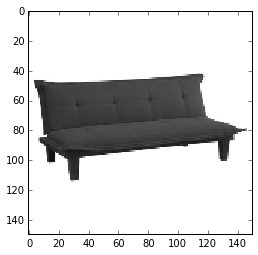

In [48]:
image = skimage.color.rgb2gray(image)
image = skimage.transform.resize(image, (150,150))
skimage.io.imshow(image)

In [99]:
features = np.array([image[irow][icol] for irow in range(150) for icol in range(150)])
#features = features.reshape((1,features.shape[0]))
features.shape

(22500,)

In [232]:
features_scaled = pca_scaler.transform(features)
pca_feature = pca_model.transform(features_scaled)

In [233]:
np.sum(features_scaled)

1245.6509291893972

In [234]:
pca_label = km_feature_pca.predict(pca_feature)[0]
pca_label

1

In [235]:
cluster_label_dict_pca['futon_DRL1299_12.jpg']

1

In [236]:
pca_same_label = []
for i in cluster_label_dict_pca:
    if cluster_label_dict_pca[i] == pca_label:
        pca_same_label.append(i)

In [237]:
similar_item_pca = []
for i in pca_same_label:
    similar_item_pca.append(i.split('.')[0].split('_')[-2])

## TFIDF

In [118]:
tfidf_vec = tfidf.transform([text]).todense()
tfidf_vec.shape

(1, 1000)

In [117]:
tfidf_matrix.shape

(1484, 1000)

In [213]:
text_cosine_distances = []
for i in xrange(tfidf_matrix.shape[0]):
    cosine_distance = cosine(tfidf_vec, tfidf_matrix[i,:])
    text_cosine_distances.append(cosine_distance)
text_cosine_distances = np.array(cosine_distances)

In [216]:
text_similr_indice = np.argsort(text_cosine_distances)[1:20]
text_similr_indice

array([1353, 1400,   89,  116, 1324, 1313, 1479, 1405,   86, 1372,  108,
       1312,  103, 1320,   88,    4, 1453, 1381, 1314])

In [215]:
np.array(text_cosine_distances)[np.argsort(text_cosine_distances)[1:20]]

array([ 0.29984124,  0.35517103,  0.40701951,  0.4517147 ,  0.45443642,
        0.45629436,  0.47222749,  0.49241003,  0.50717877,  0.51479985,
        0.51791456,  0.52076696,  0.52251194,  0.54331118,  0.54373845,
        0.54399674,  0.5450985 ,  0.54619865,  0.54810523])

In [219]:
text_similar_item = []
for i in text_similr_indice:
    index = int(sofa_all_df.index[i])
    product_id = sofa_all_df.ix[index, 'product_id']
    text_similar_item.append(product_id)

In [220]:
text_similar_item = [str(x) for x in text_similar_item]

In [221]:
similar_item_domi = list(set(similar_item_domi))
similar_item_pca = list(set(similar_item_pca))
text_similar_item = list(set(text_similar_item))

In [222]:
similar_item = similar_item_domi + similar_item_pca + text_similar_item

In [223]:
Counter(similar_item)

Counter({'ANDO1714': 1,
         'ANDO1737': 1,
         'ANH1980': 1,
         'ARA1254': 1,
         'ARA1257': 1,
         'ARA1474': 1,
         'ARA1475': 1,
         'BL3373': 1,
         'BL3380': 2,
         'BL3381': 1,
         'BL3393': 2,
         'BL3399': 2,
         'BL3408': 1,
         'BL3419': 1,
         'BL3422': 2,
         'BL3425': 1,
         'BL3428': 1,
         'BL3429': 1,
         'BL3430': 1,
         'BL5769': 1,
         'BL5784': 2,
         'BLD1115': 1,
         'BRH3744': 1,
         'BRH3828': 1,
         'BYSN1002': 1,
         'BYSN1003': 1,
         'BYSN1005': 1,
         'BYSN1014': 1,
         'BYSN1020': 1,
         'BYSN1032': 1,
         'BYSN1040': 1,
         'BYSN1056': 1,
         'BYSN1057': 1,
         'BYSN1133': 1,
         'BYSN1134': 1,
         'BYSN1210': 1,
         'BYSN1232': 1,
         'BYSN1241': 1,
         'BYSN1247': 1,
         'BYSN1253': 1,
         'BYV1682': 1,
         'BYV1686': 1,
         'BYV2438': 1,
       

In [224]:
[x for x in domi_same_label if 'CST16385' in x]

['futon_CST16385_1.jpg', 'futon_CST16385_0.jpg']

In [208]:
[x for x in domi_same_label if 'ENT1125' in x]

['sofa_ENT1125_11.jpg']

# Compare time to load tfidf_matrixes:
## Load from csv file is 10 times faster!!
# Actually training the tfidf take about 1 sec, not much longer than loading the matrix....

In [246]:
start = time.time()
test_matrix = np.loadtxt("wayfair/pickle/tfidf_matrix.csv",delimiter=",")
time.time() - start

0.595829963684082

In [247]:
start = time.time()
with open('wayfair/pickle/sofa_tfidf_matrix.pkl') as f:
    tfidf_matrix = pickle.load(f)
time.time() - start

5.5685200691223145

In [257]:
test_matrix.shape, tfidf_matrix.shape

((1484, 1000), (1484, 1000))

In [258]:
np.mean(test_matrix == tfidf_matrix)

1.0

# Now recommand without kmeans!
# To do: rewrite image_process_new.py!!

In [304]:
start = time.time()
with open('wayfair/pickle/sofa_domi_color_dict.pkl') as f:
    domi_color_dict = pickle.load(f)

with open('wayfair/pickle/sofa_feature_dict_pca.pkl') as f:
    feature_dict_pca = pickle.load(f)
with open('wayfair/pickle/sofa_pca_scaler.pkl') as f:
    pca_scaler = pickle.load(f)
with open('wayfair/pickle/sofa_pca_model.pkl') as f:
    pca_model = pickle.load(f)
time.time() - start

7.469990015029907

# Takes to long to load. 
# To do: create the dataframe ahead of time as save as json!

Stuff I need:

domi:
* domi_dict: path -> vector

pca:
* pca_dict: path -> vector
* scaler
* pca model


In [30]:
def get_reverse_dict(dict):
    reverse_dict = {}
    for i, j in dict.iteritems():
        reverse_dict[tuple(j)] = i
    return reverse_dict

In [210]:
domi_color_dict_no_false = {}
for i in domi_color_dict:
    if type(domi_color_dict[i]) != bool:
        domi_color_dict_no_false[i] = domi_color_dict[i]

domi_reverse_dict = get_reverse_dict(domi_color_dict_no_false)
pca_reverse_dict = get_reverse_dict(feature_dict_pca)

In [226]:
domi_distances = []
domi_vectors = domi_reverse_dict.keys()
for i in domi_vectors:
    domi_distance = euclidean(domi_color, i)
    domi_distances.append(domi_distance)
domi_distances = np.array(domi_distances)

In [231]:
max(domi_distances), min(domi_distances)

(1.0717033899089645, 0.0)

In [238]:
pca_distances = []
pca_vectors = pca_reverse_dict.keys()
for i in pca_vectors:
    pca_distance = euclidean(pca_feature, i)
    pca_distances.append(pca_distance)
pca_distances = np.array(pca_distances)

In [243]:
max(pca_distances), min(pca_distances)

(950.64678057264064, 0.97202037944363495)

# Start to creat dataframe with dictionaries: 
* domi_distances: 0 - 1.07
* pca_distances: 0.97 - 950
* text_distances: 0 - 1

* first: put domi_dict & pca_dict into the same dataframe.
* Then add more stuff to the dataframe to include the following columns:
path, product_id, domi_distance, pca_distance, text_distance, total_distance, (title, price, url)

In [468]:
domi_pca_dict = defaultdict(dict)
for i in domi_color_dict_no_false:
    domi_pca_dict[i]['domi'] = domi_color_dict_no_false[i]
for i in feature_dict_pca:
    domi_pca_dict[i]['pca'] = feature_dict_pca[i]

In [469]:
domi_pca_df = pd.DataFrame(domi_pca_dict).T
domi_pca_df.head(2)

,domi,pca
futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103..."
futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507..."


In [470]:
domi_pca_df = domi_pca_df.reset_index()
domi_pca_df.head(2)

,index,domi,pca
0,futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103..."
1,futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507..."


In [471]:
domi_pca_df.rename(columns={'index': 'path'}, inplace=True)
domi_pca_df.head(2)

,path,domi,pca
0,futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103..."
1,futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507..."


In [472]:
domi_pca_df['product_id'] = domi_pca_df['path'].apply(lambda x:x.split('.')[0].split('_')[-2])
domi_pca_df.head()

,path,domi,pca,product_id
0,futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103...",ANDO1714
1,futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507...",ANDO1714
2,futon_BYSN1002_0.jpg,"[0.413972339827, 0.364938777584, 0.341920039801]","[-47.4213605356, -13.7191137939, -16.244279646...",BYSN1002
3,futon_BYSN1002_2.jpg,"[0.438385311218, 0.386744781772, 0.356089122047]","[-26.0672966235, 17.8829111912, -30.7205323687...",BYSN1002
4,futon_BYSN1002_3.jpg,"[0.460338892952, 0.406696622799, 0.379009253025]","[-19.2093019661, 21.0764448383, -22.1545134771...",BYSN1002


In [473]:
sofa_all_df.head(2)

,category,colors,description,description_all,features,image_links_all,image_links_by_color,manufacturer,price,product_id,rating_avg,rating_count,specs,title,url,website
0,sofa,"[Cobblestone, Café, Mocha, Sage, Salsa, Stone]",Add a touch of comfort and style to your home ...,Add a touch of comfort and style to your home ...,\nFeatures\n\nHarvest collection\nMaterial: 10...,[https://secure.img2.wfrcdn.com/lf/49/hash/266...,{u'Stone': [u'https://secure.img2.wfrcdn.com/l...,Signature Design by Ashley,357.99,GNT3224,4.4,115,\nWeights & Dimensions\n\n\n\n Over...,Harvest Sofa,http://www.wayfair.com/Harvest-Sofa-7500-GNT32...,wayfair
1,sofa,"[Blue Linen / Chevron, Blue Linen / Greek Key,...",Sleeping on the sofa has never been so chic. S...,Sleeping on the sofa has never been so chic. S...,\nFeatures\n\nMaterial: 100% Polyester Linen\n...,[https://secure.img1.wfrcdn.com/lf/49/hash/338...,{u'Blue Linen / Chevron': [u'https://secure.im...,Mercury Row,529.99,MCRR1650,4.1,189,\nWeights & Dimensions\nSeat Cushion\n\n\n ...,Convertible Sleeper Sofa,http://www.wayfair.com/Convertible-Sleeper-Sof...,wayfair


In [474]:
sofa_df_small = sofa_all_df[['product_id', 'title', 'price', 'url', 'description_all']]
sofa_df_small.head(2)

,product_id,title,price,url,description_all
0,GNT3224,Harvest Sofa,357.99,http://www.wayfair.com/Harvest-Sofa-7500-GNT32...,Add a touch of comfort and style to your home ...
1,MCRR1650,Convertible Sleeper Sofa,529.99,http://www.wayfair.com/Convertible-Sleeper-Sof...,Sleeping on the sofa has never been so chic. S...


In [475]:
sofa_all_info_df = pd.merge(domi_pca_df, sofa_df_small, how='inner', left_on='product_id', 
                            right_on='product_id')
sofa_all_info_df.head()

,path,domi,pca,product_id,title,price,url,description_all
0,futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103...",ANDO1714,Mauer Futon,199.99,http://www.wayfair.com/Venti-Futon-and-Mattres...,"A refreshing take on a classic design, this Fu..."
1,futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507...",ANDO1714,Mauer Futon,199.99,http://www.wayfair.com/Venti-Futon-and-Mattres...,"A refreshing take on a classic design, this Fu..."
2,futon_BYSN1002_0.jpg,"[0.413972339827, 0.364938777584, 0.341920039801]","[-47.4213605356, -13.7191137939, -16.244279646...",BYSN1002,Newark Convertible Sofa,609.99,http://www.wayfair.com/Beyan-Signature-Newark-...,Add a touch of elegance to your living room wi...
3,futon_BYSN1002_2.jpg,"[0.438385311218, 0.386744781772, 0.356089122047]","[-26.0672966235, 17.8829111912, -30.7205323687...",BYSN1002,Newark Convertible Sofa,609.99,http://www.wayfair.com/Beyan-Signature-Newark-...,Add a touch of elegance to your living room wi...
4,futon_BYSN1002_3.jpg,"[0.460338892952, 0.406696622799, 0.379009253025]","[-19.2093019661, 21.0764448383, -22.1545134771...",BYSN1002,Newark Convertible Sofa,609.99,http://www.wayfair.com/Beyan-Signature-Newark-...,Add a touch of elegance to your living room wi...


In [476]:
sofa_all_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4661 entries, 0 to 4660
Data columns (total 8 columns):
path               4661 non-null object
domi               4659 non-null object
pca                4660 non-null object
product_id         4661 non-null object
title              4661 non-null object
price              4661 non-null float64
url                4661 non-null object
description_all    4661 non-null object
dtypes: float64(1), object(7)
memory usage: 327.7+ KB


In [477]:
sofa_all_info_df = sofa_all_info_df[sofa_all_info_df['domi'].notnull()]
sofa_all_info_df = sofa_all_info_df[sofa_all_info_df['pca'].notnull()]
sofa_all_info_df = sofa_all_info_df[sofa_all_info_df['description_all'].notnull()]

In [478]:
sofa_all_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658 entries, 0 to 4660
Data columns (total 8 columns):
path               4658 non-null object
domi               4658 non-null object
pca                4658 non-null object
product_id         4658 non-null object
title              4658 non-null object
price              4658 non-null float64
url                4658 non-null object
description_all    4658 non-null object
dtypes: float64(1), object(7)
memory usage: 327.5+ KB


In [479]:
start = time.time()

X = sofa_all_info_df['description_all']
tfidf = TfidfVectorizer(strip_accents='unicode', stop_words='english', max_df=0.8, 
                        max_features=1000, ngram_range = (1,2))
tfidf_matrix = tfidf.fit_transform(X).todense()

time.time() - start

2.1646339893341064

## With that dataframe & image & text:

In [480]:
start = time.time()

#domi
domi_color = get_domi_color_new_image(image)
#pca
image = skimage.color.rgb2gray(image)
image = skimage.transform.resize(image, (150,150))
features = np.array([image[irow][icol] for irow in range(150) for icol in range(150)])
features_scaled = pca_scaler.transform(features)
pca_feature = pca_model.transform(features_scaled)
#tfidf
tfidf_vec = tfidf.transform([text]).todense()

time.time() - start

0.3384971618652344

In [481]:
start = time.time()
sofa_all_info_df['domi_distance'] = sofa_all_info_df['domi'].apply(lambda x:euclidean(domi_color, x))
sofa_all_info_df['pca_distance'] = sofa_all_info_df['pca'].apply(lambda x:euclidean(pca_feature, x))
time.time() - start

0.23513388633728027

In [482]:
start = time.time()
sofa_all_info_df['text_distance'] = sofa_all_info_df['description_all'].apply(lambda x:cosine(tfidf_vec, tfidf.transform([x]).todense()))
time.time() - start

6.233911037445068

# To do: think about how to use tfidf_matrix to make the cell above run quicker!

In [483]:
sofa_all_info_df.head(2)

,path,domi,pca,product_id,title,price,url,description_all,domi_distance,pca_distance,text_distance
0,futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103...",ANDO1714,Mauer Futon,199.99,http://www.wayfair.com/Venti-Futon-and-Mattres...,"A refreshing take on a classic design, this Fu...",0.143528,112.579125,0.554377
1,futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507...",ANDO1714,Mauer Futon,199.99,http://www.wayfair.com/Venti-Futon-and-Mattres...,"A refreshing take on a classic design, this Fu...",0.143260,81.185876,0.554377


In [495]:
sofa_all_info_df['total_distance'] = sofa_all_info_df['domi_distance'] * 1 + sofa_all_info_df['pca_distance']/1000 + sofa_all_info_df['text_distance']

In [496]:
sofa_all_info_df.head(2)

,path,domi,pca,product_id,title,price,url,description_all,domi_distance,pca_distance,text_distance,total_distance
0,futon_ANDO1714_0.jpg,"[0.376095424973, 0.300712427176, 0.266646716767]","[-46.5324185098, -13.9255443673, -18.789695103...",ANDO1714,Mauer Futon,199.99,http://www.wayfair.com/Venti-Futon-and-Mattres...,"A refreshing take on a classic design, this Fu...",0.143528,112.579125,0.554377,0.810484
1,futon_ANDO1714_3.jpg,"[0.309712681202, 0.235399065741, 0.200327972691]","[0.983447089849, 44.6058749608, -18.1949406507...",ANDO1714,Mauer Futon,199.99,http://www.wayfair.com/Venti-Futon-and-Mattres...,"A refreshing take on a classic design, this Fu...",0.143260,81.185876,0.554377,0.778823


In [497]:
sofa_display_df = sofa_all_info_df[['path', 'product_id', 'title', 'price', 'url', 'total_distance', 'domi_distance', 'pca_distance', 'text_distance']]

In [498]:
sofa_display_df.sort(columns='total_distance', axis=0, ascending=True, inplace=True)

In [499]:
sofa_display_df

,path,product_id,title,price,url,total_distance,domi_distance,pca_distance,text_distance
252,futon_DRL1299_12.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.001000,0.000028,0.972020,0.000000
253,futon_DRL1299_15.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.161800,0.023652,138.147431,0.000000
259,futon_DRL1299_9.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.204425,0.189341,15.084468,0.000000
258,futon_DRL1299_8.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.276519,0.193352,83.166648,0.000000
250,futon_DRL1299_1.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.308120,0.268763,39.357198,0.000000
254,futon_DRL1299_2.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.331841,0.242563,89.277972,0.000000
257,futon_DRL1299_5.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.390124,0.249343,140.780444,0.000000
256,futon_DRL1299_4.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.393971,0.296213,97.758593,0.000000
255,futon_DRL1299_3.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.442739,0.316037,126.702750,0.000000
235,futon_DRL1244_8.jpg,DRL1244,Metropolitan Convertible Sofa,385.99,http://www.wayfair.com/DHP-Metropolitan-Futon-...,0.595329,0.094102,109.840639,0.391387


In [500]:
index = sofa_display_df.index
sofa_final_df = pd.DataFrame(sofa_display_df.ix[index[0]]).T

In [501]:
for i in index[1:]:
    if sofa_final_df.shape[0] < 10 and sofa_display_df.ix[i, 'product_id'] not in sofa_final_df['product_id'].values:
        product_df = pd.DataFrame(sofa_display_df.ix[i]).T
        sofa_final_df = pd.concat([sofa_final_df, product_df], axis=0)

In [502]:
sofa_final_df

,path,product_id,title,price,url,total_distance,domi_distance,pca_distance,text_distance
252,futon_DRL1299_12.jpg,DRL1299,Lodge Futon Frame & Mattress,150.99,http://www.wayfair.com/DHP-Lodge-Futon-Frame-a...,0.000999647,2.762663e-05,0.9720204,0
235,futon_DRL1244_8.jpg,DRL1244,Metropolitan Convertible Sofa,385.99,http://www.wayfair.com/DHP-Metropolitan-Futon-...,0.5953288,0.09410161,109.8406,0.3913866
319,futon_DRL1572_0.jpg,DRL1572,Contempo Futon,209.99,http://www.wayfair.com/Contempo-Futon-and-Matt...,0.6120475,0.1927771,87.29339,0.3319771
318,futon_DRL1563_1.jpg,DRL1563,Premium Dallas Futon and Mattress,439.99,http://www.wayfair.com/Premium-Dallas-Futon-an...,0.6809274,0.1495056,79.11322,0.4523086
313,futon_DRL1559_0.jpg,DRL1559,Edge Futon and Mattress,169.95,http://www.wayfair.com/Edge-Futon-and-Mattress...,0.6917224,0.2909193,60.04844,0.3407546
303,futon_DRL1390_2.jpg,DRL1390,Delaney Splitback Futon,189.99,http://www.wayfair.com/DHP-Delaney-Splitback-F...,0.7104686,0.1356944,94.61759,0.4801566
409,futon_EL2641_22.jpg,EL2641,Mali Flex Futon and Mattress,264.99,http://www.wayfair.com/Elite-Products-Mali-Fle...,0.7156546,0.1501878,115.6575,0.4498092
202,futon_DRL1086_6.jpg,DRL1086,X Wood Arms for Futon,114.99,http://www.wayfair.com/DHP-Futon-X-Wood-Arms-3...,0.742624,0.1005944,121.6549,0.5203748
297,futon_DRL1381_3.jpg,DRL1381,Dillan Convertible Futon,234.99,http://www.wayfair.com/DHP-Dillan-Convertible-...,0.7489256,0.2025282,89.57066,0.4568267
269,futon_DRL1341_3.jpg,DRL1341,Charleston Vintage Futon Lounger,379.95,http://www.wayfair.com/DHP-Charleston-Vintage-...,0.7608947,0.1519452,86.18231,0.5227672


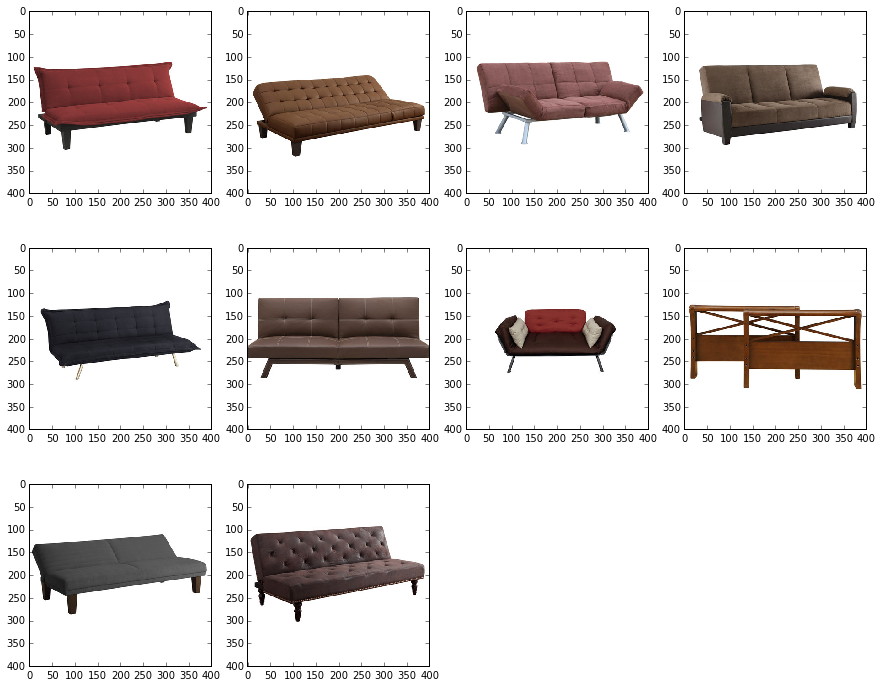

In [503]:
plt.figure(figsize=(15,12))
for i, path in enumerate(sofa_final_df['path']):
    plt.subplot(3,4,i+1)
    image = skimage.io.imread('wayfair/images/sofa_all/' + path)
    skimage.io.imshow(image)